In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN



In [24]:
airline=pd.read_excel("EastWestAirline.xlsx")
airline.head(20)

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     1    28143           0          1          1          1          174   
1     2    19244           0          1          1          1          215   
2     3    41354           0          1          1          1         4123   
3     4    14776           0          1          1          1          500   
4     5    97752           0          4          1          1        43300   
5     6    16420           0          1          1          1            0   
6     7    84914           0          3          1          1        27482   
7     8    20856           0          1          1          1         5250   
8     9   443003           0          3          2          1         1753   
9    10   104860           0          3          1          1        28426   
10   11    40091           0          2          1          1         7278   
11   12    96522           0          5          1          1        61105   
12   13    43382           0          2          1          1        11150   
13   14    43097           0          1          1          1         3258   
14   15    17648           0          1          1          1            0   
15   16    28495           0          4          1          1        49442   
16   17    51890           0          4          1          1        48963   
17   18    13958           0          1          1          1         4291   
18   19    91473           0          3          1          1        27408   
19   20    23354           0          3          1          1        10447   

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0             1                  0                0               7000       0  
1             2                  0                0               6968       0  
2             4                  0                0               7034       0  
3             1                  0                0               6952       0  
4            26               2077                4               6935       1  
5             0                  0                0               6942       0  
6            25                  0                0               6994       0  
7             4                250                1               6938       1  
8            43               3850               12               6948       1  
9            28               1150                3               6931       1  
10           10                  0                0               6959       0  
11           19                  0                0               6924       1  
12           20                  0                0               6924       0  
13            6                  0                0               6918       0  
14            0                  0                0               6912       0  
15           15                  0                0               6912       1  
16           16                  0                0               6910       1  
17            5                  0                0               6905       1  
18           17                  0                0               6903       1  
19            5                  0                0               6896       1

In [25]:
airline.shape

(3999, 12)

In [26]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [29]:
airline1=airline.drop(airline.columns[[0,11]],axis=1)

In [30]:
airline1

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0               1                  0                0               7000  
1               2                  0                0               6968  
2               4                  0                0               7034  
3               1                  0                0               6952  
4              26               2077                4               6935  
...           ...                ...              ...                ...  
3994            4                200                1               1403  
3995            5                  0                0               1395  
3996            8                  0                0               1402  
3997            1                500                1               1401  
3998            0                  0                0               1398  

[3999 rows x 10 columns]

In [31]:
array=airline1.values
array

array([[28143,     0,     1, ...,     0,     0,  7000],
       [19244,     0,     1, ...,     0,     0,  6968],
       [41354,     0,     1, ...,     0,     0,  7034],
       ...,
       [73597,     0,     3, ...,     0,     0,  1402],
       [54899,     0,     1, ...,   500,     1,  1401],
       [ 3016,     0,     1, ...,     0,     0,  1398]], dtype=int64)

In [32]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [38]:
dbscan=DBSCAN(eps=2,min_samples=11)
dbscan

DBSCAN(eps=2, min_samples=11)

In [40]:
dbscan.fit(X) 

DBSCAN(eps=2, min_samples=11)

In [41]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

cluster
0           0
1           0
2           0
3           0
4           0
...       ...
3994        0
3995        0
3996        0
3997        0
3998        0

[3999 rows x 1 columns]

In [44]:
cl
pd.set_option("display.max_rows", None) 

In [45]:
cl

cluster
0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8          -1
9           0
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21         -1
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
30          0
31          0
32          0
33          0
34          0
35          0
36          0
37          0
38          0
39          0
40          0
41          0
42          0
43          0
44          0
45          0
46          0
47          0
48          0
49          0
50         -1
51          0
52          0
53          0
54          0
55          0
56          0
57          0
58          0
59          0
60          0
61          0
62          0
63          0
64          0
65         -1
66          0
67          0
68          0
69          0
70         -1
71          0
72          0
73          0
74          0
75          0
76          0
77          0
78          0
79          0
80          0
81          0
82          0
83          0
84          0
85          0
86          0
87         -1
88          0
89          0
90          0
91          0
92          0
93          0
94         -1
95          0
96          0
97          0
98          0
99          0
100         0
101         0
102         0
103         0
104         0
105         0
106        -1
107         0
108         0
109         0
110         0
111         0
112        -1
113         0
114         0
115         0
116         0
117        -1
118         0
119         0
120         0
121        -1
122         0
123         0
124         0
125         0
126        -1
127        -1
128         0
129         0
130         0
131         0
132         0
133         0
134         0
135        -1
136         0
137         0
138         0
139         0
140         0
141         0
142         0
143         0
144         0
145         0
146         0
147         0
148         0
149         0
150         0
151        -1
152         0
153         0
154         0
155         0
156         0
157         0
158         0
159         0
160         0
161         0
162         0
163         0
164         0
165         0
166         0
167         0
168         0
169         0
170         0
171         0
172         0
173         0
174         0
175         0
176         0
177         0
178         0
179         0
180         0
181         0
182         0
183         0
184         0
185         0
186        -1
187         0
188         0
189         0
190        -1
191        -1
192         0
193         0
194         0
195         0
196         0
197         0
198         2
199         0
200         0
201         0
202         0
203         0
204         0
205         0
206         0
207         0
208         0
209         0
210         0
211         0
212         0
213         0
214         0
215         0
216         0
217         0
218         0
219         0
220        -1
221         0
222         0
223         0
224         0
225         0
226         1
227         0
228         0
229         0
230         0
231         0
232         0
233         0
234         0
235         0
236         0
237         0
238        -1
239         0
240         0
241         0
242         0
243        -1
244         0
245         0
246         0
247         0
248         0
249         0
250         0
251         0
252         0
253         0
254         0
255         0
256         0
257         0
258         0
259         0
260         0
261         0
262         0
263         0
264         0
265         0
266         0
267         0
268         0
269         0
270         0
271         0
272         0
273         0
274         0
275        -1
276         0
277         0
278         0
279         0
280         0
281         0
282         0
283         0
284         0
28

In [69]:
airline1=pd.concat([airline,cl],axis=1)
airline1

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
5        6    16420           0          1          1          1            0   
6        7    84914           0          3          1          1        27482   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
10      11    40091           0          2          1          1         7278   
11      12    96522           0          5          1          1        61105   
12      13    43382           0          2          1          1        11150   
13      14    43097           0          1          1          1         3258   
14      15    17648           0          1          1          1            0   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
17      18    13958           0          1          1          1         4291   
18      19    91473           0          3          1          1        27408   
19      20    23354           0          3          1          1        10447   
20      21   120576           0          5          1          1        58831   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
23      24    66275           0          1          1          1         2533   
24      25   205651         500          1          1          1         4025   
25      26    20726           0          1          1          1         1375   
26      27    18521           0          1          1          1         1227   
27      28     8828           0          1          1          1            0   
28      29    59763           0          3          1          1        33772   
29      30    19221           0          1          1          1         4655   
30      31   177926           0          3          1          1        20797   
31      32    10021           0          1          1          1            0   
32      33   276571           0          4          1          1        42044   
33      34    18047           0          1          1          1          100   
34      35    43832           0          1          1          1            0   
35      36   123759           0          4          1          1        50572   
36      37    23193           0          1          1          1          650   
37      38    68666           0          1          1          1          350   
38      39    59990           0          3          1          1        27878   
39      40     2176           0          1          1          1            0   
40      41    34616           0          1          1          1         1750   
41      42    10470           0          4          1          1        38094   
42      43    60313           0          1          1          1        10000   
43      44   619393           0          3          1          1        15008   
44      45   121260           0          3          1          1        18493   
45      46   288865         967          1          1          1        23600   
46      47    92336           0          2          1          1        11214   
47      48    36924           0          1          1          1         5900   
48      49    70312           0       

In [49]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic')

Text(0.5, 1.0, 'Clustering Using DBSCAN')

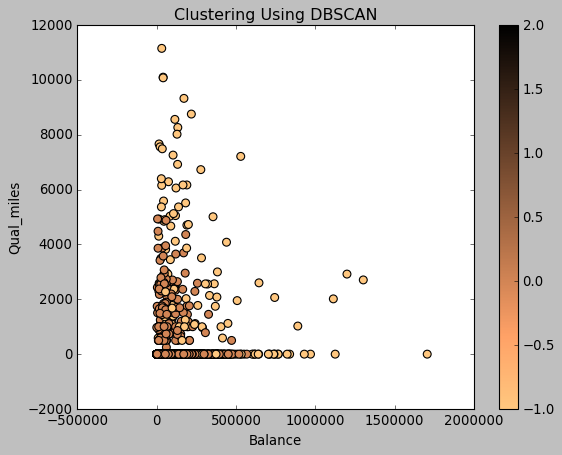

In [50]:
airline1.plot(x='Balance',y='Qual_miles',c=dbscan.labels_,kind="scatter",s=50,cmap=plt.cm.copper_r)
plt.title("Clustering Using DBSCAN")

Text(0.5, 1.0, 'Clustering Using DBSCAN')

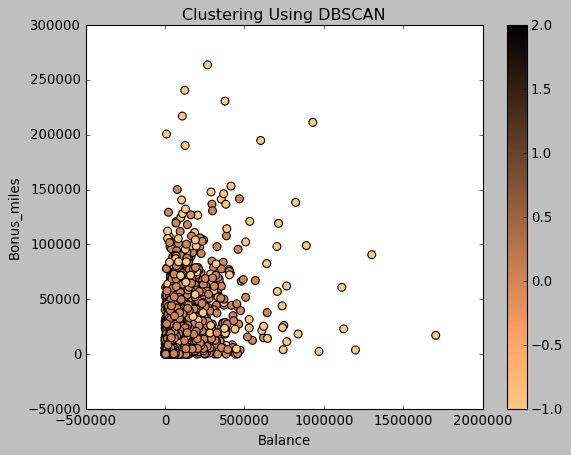

In [51]:
airline1.plot(x='Balance',y='Bonus_miles',c=dbscan.labels_,kind="scatter",s=50,cmap=plt.cm.copper_r)
plt.title("Clustering Using DBSCAN")

In [53]:
dl=dbscan.labels_
dl

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
import sklearn
sklearn.metrics.silhouette_score(X,dl)

0.5815524244175214

In [59]:
from sklearn.cluster import KMeans 
clf=KMeans(n_clusters=3) 
y_KMeans=clf.fit_predict(X)

In [60]:
y_KMeans

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
cl1=pd.DataFrame(y_KMeans,columns=['kcluster'])
cl1

kcluster
0            0
1            0
2            0
3            0
4            1
5            0
6            1
7            0
8            2
9            1
10           0
11           1
12           1
13           0
14           0
15           1
16           1
17           0
18           1
19           0
20           1
21           2
22           2
23           0
24           1
25           0
26           0
27           0
28           1
29           0
30           1
31           0
32           1
33           0
34           0
35           1
36           0
37           0
38           1
39           0
40           0
41           1
42           2
43           1
44           1
45           1
46           0
47           0
48           1
49           0
50           2
51           0
52           1
53           0
54           0
55           0
56           1
57           0
58           1
59           1
60           1
61           0
62           0
63           1
64           0
65           2
66           0
67           1
68           1
69           1
70           1
71           1
72           1
73           0
74           1
75           1
76           0
77           1
78           1
79           1
80           0
81           0
82           0
83           0
84           0
85           1
86           0
87           1
88           0
89           0
90           0
91           0
92           1
93           0
94           2
95           0
96           0
97           1
98           0
99           1
100          1
101          0
102          0
103          0
104          0
105          1
106          2
107          0
108          1
109          1
110          1
111          2
112          2
113          0
114          1
115          1
116          0
117          1
118          1
119          0
120          0
121          1
122          1
123          1
124          1
125          1
126          2
127          2
128          0
129          1
130          0
131          0
132          0
133          0
134          1
135          2
136          1
137          1
138          1
139          0
140          0
141          0
142          0
143          1
144          1
145          0
146          0
147          1
148          1
149          0
150          1
151          1
152          1
153          0
154          1
155          1
156          1
157          1
158          1
159          0
160          1
161          1
162          0
163          1
164          1
165          0
166          0
167          1
168          1
169          1
170          1
171          0
172          1
173          0
174          1
175          1
176          0
177          0
178          0
179          0
180          0
181          1
182          0
183          0
184          1
185          1
186          2
187          0
188          1
189          0
190          1
191          2
192          1
193          0
194          0
195          0
196          1
197          1
198          0
199          1
200          1
201          1
202          0
203          1
204          0
205          0
206          1
207          0
208          1
209          0
210          1
211          0
212          0
213          1
214          0
215          1
216          0
217          0
218          1
219          1
220          2
221          1
222          0
223          0
224          1
225          0
226          0
227          1
228          0
229          1
230          1
231          1
232          0
233          0
234          0
235          1
236          0
237          1
238          2
239          0
240          1
241          0
242          1
243          2
244          1
245          2
246          0
247          0
248          1
249          0
250          0
251          1
252          1
253          1
254          0
255          1
256          2
257          1
258          0
259          1
260          0
261          0
262          1
263          1
264          0
265          1
2

In [62]:
airline2=pd.concat([airline1,cl1],axis=1)
airline2

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
5        6    16420           0          1          1          1            0   
6        7    84914           0          3          1          1        27482   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
10      11    40091           0          2          1          1         7278   
11      12    96522           0          5          1          1        61105   
12      13    43382           0          2          1          1        11150   
13      14    43097           0          1          1          1         3258   
14      15    17648           0          1          1          1            0   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
17      18    13958           0          1          1          1         4291   
18      19    91473           0          3          1          1        27408   
19      20    23354           0          3          1          1        10447   
20      21   120576           0          5          1          1        58831   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
23      24    66275           0          1          1          1         2533   
24      25   205651         500          1          1          1         4025   
25      26    20726           0          1          1          1         1375   
26      27    18521           0          1          1          1         1227   
27      28     8828           0          1          1          1            0   
28      29    59763           0          3          1          1        33772   
29      30    19221           0          1          1          1         4655   
30      31   177926           0          3          1          1        20797   
31      32    10021           0          1          1          1            0   
32      33   276571           0          4          1          1        42044   
33      34    18047           0          1          1          1          100   
34      35    43832           0          1          1          1            0   
35      36   123759           0          4          1          1        50572   
36      37    23193           0          1          1          1          650   
37      38    68666           0          1          1          1          350   
38      39    59990           0          3          1          1        27878   
39      40     2176           0          1          1          1            0   
40      41    34616           0          1          1          1         1750   
41      42    10470           0          4          1          1        38094   
42      43    60313           0          1          1          1        10000   
43      44   619393           0          3          1          1        15008   
44      45   121260           0          3          1          1        18493   
45      46   288865         967          1          1          1        23600   
46      47    92336           0          2          1          1        11214   
47      48    36924           0          1          1          1         5900   
48      49    70312           0       

Text(0.5, 1.0, 'Cluster using dbscan')

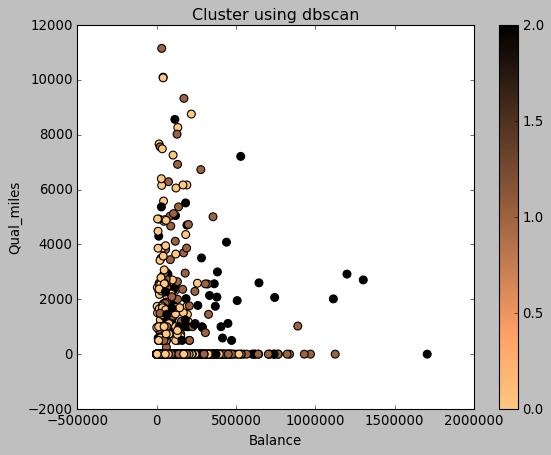

In [66]:
airline2.plot(x="Balance",y="Qual_miles",c=y_KMeans,kind="scatter",s=50,cmap=plt.cm.copper_r)
plt.title("Cluster using dbscan")

In [67]:
sklearn.metrics.silhouette_score(X,y_KMeans)

0.33003807107867994

In [ ]:
#from sklearn.neighbors import NearestNeighbors

In [34]:
#neigh=NearestNeighbors(n_neighbors=20)
#nbrs=neigh.fit(X)
#distance,indices=nbrs.kneighbors(X)

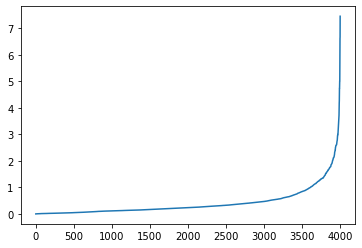

In [35]:
#distance=np.sort(distance,axis=0)
#distance=distance[:,1]
#plt.plot(distance)